# K-Nearest Neighbors (KNN)

Esploriamo l'algoritmo K-Nearest Neighbors (KNN), uno degli algoritmi di machine learning più semplici ma potenti.

- Implementeremo KNN da zero seguendo quanto visto in teoria
- Vedremo il funzionamneto su diversi dataset.

## 1. Introduzione a K-Nearest Neighbors

K-Nearest Neighbors è un algoritmo di apprendimento supervisionato utilizzato principalmente per problemi di **classificazione** e **regressione**.

L'idea centrale di KNN è che oggetti simili tendono a trovarsi vicini nello spazio delle feature.

### Concetti chiave:

- **Vicinanza**: Le predizioni si basano sulla vicinanza tra i punti nello spazio delle feature
- **Non parametrico**: Non fa assunzioni sulla distribuzione sottostante dei dati
- **Lazy learning**: Non costruisce un modello durante la fase di training, ma memorizza i dati
- **Instance-based learning**: Classifica nuove istanze basandosi sulla similarità con esempi noti

## 2. Fondamenti Matematici

Per classificare un nuovo punto dati, KNN considera i K punti più vicini dal dataset di training e assegna la classe più comune tra questi vicini.

### Calcolo della distanza

La metrica di distanza più comune è la distanza Euclidea:

$$d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

Altre distanze comuni includono:

- **Distanza di Manhattan (L1)**: $$d(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^{n} |x_i - y_i|$$

- **Distanza di Minkowski**: Generalizzazione delle precedenti

$$d_{M}(x, y) = \left(\sum_{i=1}^{n} |x_i - y_i|^p\right)^{1/p}$$

dove $p$ è un parametro (per $p=1$ otteniamo Manhattan, per $p=2$ Euclidea)



<img src="https://media.geeksforgeeks.org/wp-content/uploads/20231207103856/KNN-Algorithm-(1).png">

from https://www.geeksforgeeks.org

### Algoritmo di classificazione KNN:

Per un'istanza di test $x$ e un numero $k$ di vicini:

1. Calcola la distanza tra $x$ e tutte le istanze del training set
2. Seleziona le $k$ istanze più vicine
3. Assegna a $x$ la classe più frequente tra i $k$ vicini

In termini matematici, la previsione per un'istanza di query $q$ è:

$$y(q) = \arg\max_{l \in levels(t)} \sum_{i=1}^{k} \delta(t_i, l)$$

dove:

- $y(q)$ è la previsione della classe per la query $q$
- $levels(t)$ è l'insieme delle classi possibili
- $t_i$ è la classe dell'i-esimo vicino
- $\delta(t_i, l)$ è la funzione delta di Kronecker, che vale 1 se $t_i = l$, altrimenti 0

### Piccolo esercizio preliminare sulle distanze

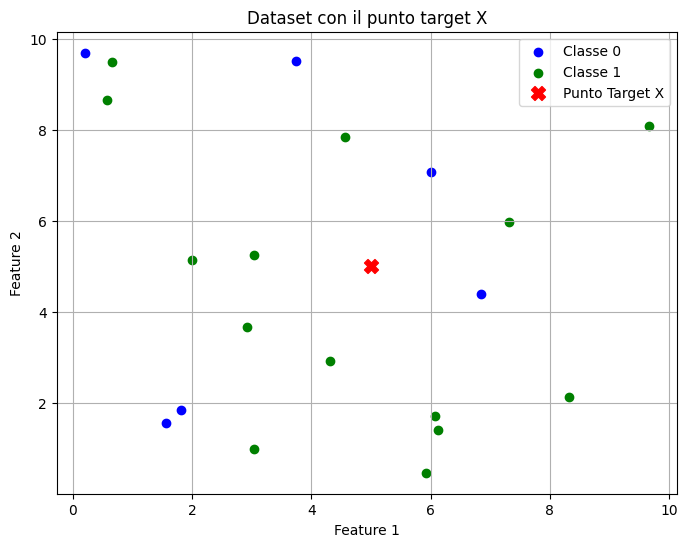

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Imposto un seed per la riproducibilità
np.random.seed(42)

# Creo un insieme di punti casuali (20 punti in 2D)
points = np.random.rand(20, 2) * 10  # Punti in un range 0-10

# Ogni punto avrà una classe casuale (0 o 1) per colorare il grafico
classes = np.random.randint(0, 2, 20)

# Definisco il punto X di cui voglio trovare i vicini (il nostro target)
X = np.array([5.0, 5.0])

# Visualizzo il dataset iniziale con il punto target
plt.figure(figsize=(8, 6))
# Plotto tutti i punti colorati in base alla classe
plt.scatter(points[classes == 0, 0], points[classes == 0, 1], 
           color='blue', label='Classe 0')
plt.scatter(points[classes == 1, 0], points[classes == 1, 1], 
           color='green', label='Classe 1')
# Plotto il punto X in rosso e più grande
plt.scatter(X[0], X[1], color='red', s=100, marker='X', label='Punto Target X')
plt.title('Dataset con il punto target X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.legend()
plt.show()

In [28]:
# Funzione per calcolare la distanza euclidea
def euclidean_distance(x1, x2):
    """Calcola la distanza euclidea tra due vettori."""
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Funzione alternativa per calcolare la distanza di Manhattan
def manhattan_distance(x1, x2):
    """Calcola la distanza di Manhattan tra due vettori."""
    return np.sum(np.abs(x1 - x2))

# Funzione per calcolare la distanza di Minkowski
def minkowski_distance(x1, x2, p=2):
    """Calcola la distanza di Minkowski tra due vettori."""
    return np.power(np.sum(np.power(np.abs(x1 - x2), p)), 1/p)


In [30]:
# Calcolo le distanze di tutti i punti dal punto X
distances = []
for i, point in enumerate(points):
    dist = euclidean_distance(X, point)
    distances.append((dist, i))

# Ordino le distanze in ordine crescente
distances.sort(key=lambda x: x[0])

# Prendo i 3 vicini più prossimi
k_nearest = distances[:3]
nearest_indices = [idx for _, idx in k_nearest]

In [32]:
# Calcolo le distanze di tutti i punti dal punto X utilizzando la distanza euclidea
distances = []
for i, point in enumerate(points):
    dist = euclidean_distance(X, point)
    distances.append((dist, i, point, classes[i]))

# Ordino le distanze in ordine crescente
distances.sort(key=lambda x: x[0])

# Prendo i 3 vicini più prossimi
k_nearest = distances[:3]
nearest_indices = [idx for _, idx, _, _ in k_nearest]

# Mostro le distanze calcolate
print("Distanze di tutti i punti dal punto target X (5, 5):")
print("Indice\tClasse\tCoordinate\t\tDistanza")
print("-" * 50)
for i, (dist, idx, point, cls) in enumerate(distances):
    print(f"{idx}\t{cls}\t[{point[0]:.2f}, {point[1]:.2f}]\t\t{dist:.4f}")

print("\nI 3 vicini più prossimi sono:")
print("Indice\tClasse\tCoordinate\t\tDistanza")
print("-" * 50)
for i, (dist, idx, point, cls) in enumerate(k_nearest):
    print(f"{idx}\t{cls}\t[{point[0]:.2f}, {point[1]:.2f}]\t\t{dist:.4f}")

Distanze di tutti i punti dal punto target X (5, 5):
Indice	Classe	Coordinate		Distanza
--------------------------------------------------
19	0	[6.84, 4.40]		1.9371
8	1	[3.04, 5.25]		1.9732
9	1	[4.32, 2.91]		2.1958
4	0	[6.01, 7.08]		2.3134
11	1	[2.92, 3.66]		2.4711
1	1	[7.32, 5.99]		2.5210
12	1	[4.56, 7.85]		2.8854
13	1	[2.00, 5.14]		3.0066
15	1	[6.08, 1.71]		3.4658
10	1	[6.12, 1.39]		3.7746
6	1	[8.32, 2.12]		4.3962
18	1	[3.05, 0.98]		4.4726
7	0	[1.82, 1.83]		4.4885
14	1	[5.92, 0.46]		4.6287
0	0	[3.75, 9.51]		4.6785
2	0	[1.56, 1.56]		4.8648
17	1	[9.66, 8.08]		5.5850
3	1	[0.58, 8.66]		5.7391
16	1	[0.65, 9.49]		6.2504
5	0	[0.21, 9.70]		6.7131

I 3 vicini più prossimi sono:
Indice	Classe	Coordinate		Distanza
--------------------------------------------------
19	0	[6.84, 4.40]		1.9371
8	1	[3.04, 5.25]		1.9732
9	1	[4.32, 2.91]		2.1958


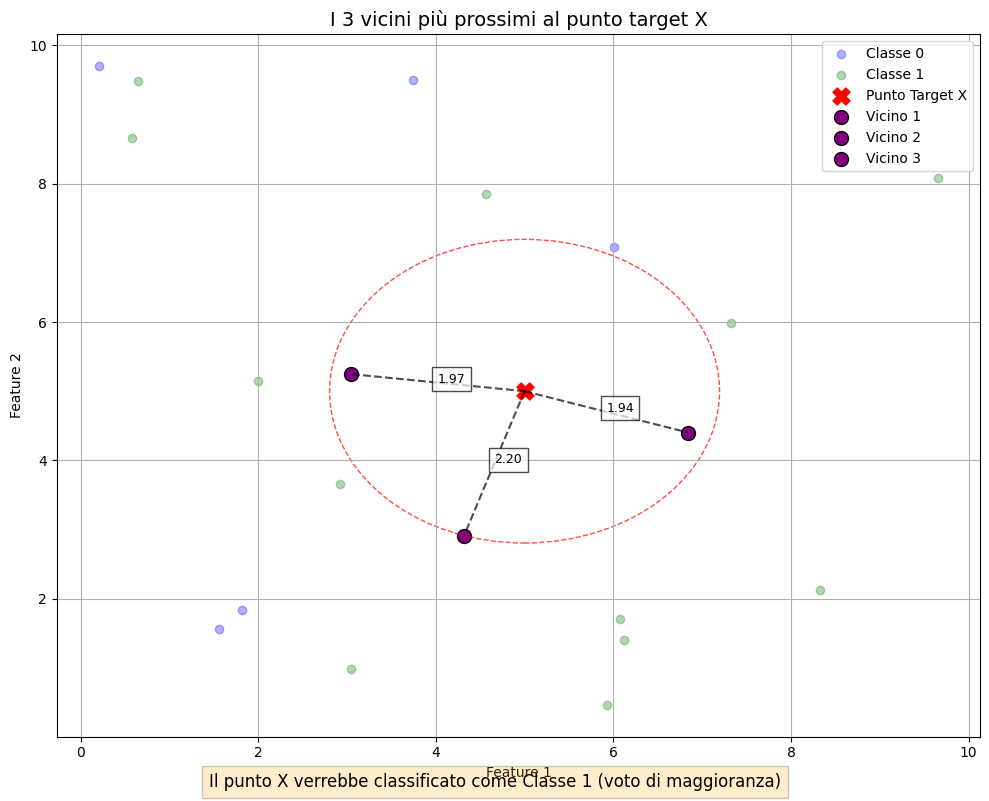

In [33]:
# Plot finale che evidenzia i 3 vicini più prossimi
plt.figure(figsize=(10, 8))

# Plotto tutti i punti con trasparenza
plt.scatter(points[classes == 0, 0], points[classes == 0, 1], 
           color='blue', alpha=0.3, label='Classe 0')
plt.scatter(points[classes == 1, 0], points[classes == 1, 1], 
           color='green', alpha=0.3, label='Classe 1')

# Plotto il punto X
plt.scatter(X[0], X[1], color='red', s=150, marker='X', label='Punto Target X')

# Evidenzio i 3 vicini più prossimi
for i, (dist, idx, point, cls) in enumerate(k_nearest):
    plt.scatter(point[0], point[1], color='purple', s=100, 
               edgecolor='k', label=f'Vicino {i+1}')
    # Disegno una linea tra X e il vicino
    plt.plot([X[0], point[0]], [X[1], point[1]], 
            'k--', alpha=0.7)
    # Aggiungo un'etichetta con la distanza
    mid_x = (X[0] + point[0]) / 2
    mid_y = (X[1] + point[1]) / 2
    plt.text(mid_x, mid_y, f"{dist:.2f}", fontsize=9, 
             bbox=dict(facecolor='white', alpha=0.7))
    
# Aggiungo un cerchio per indicare il raggio che include i 3 vicini
radius = k_nearest[2][0]  # Raggio che include i 3 vicini
circle = plt.Circle((X[0], X[1]), radius, color='r', fill=False, 
                   linestyle='--', alpha=0.7)
plt.gca().add_patch(circle)

plt.title('I 3 vicini più prossimi al punto target X', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.legend()

# Aggiungo una conclusione sul grafico
if len(set([cls for _, _, _, cls in k_nearest])) == 1:
    klass = k_nearest[0][3]
    plt.figtext(0.5, 0.01, 
                f"Il punto X verrebbe classificato come Classe {klass} (voto unanime)", 
                ha="center", fontsize=12, 
                bbox={"facecolor":"orange", "alpha":0.2, "pad":5})
else:
    # Conto le occorrenze di ogni classe
    class_counts = {}
    for _, _, _, cls in k_nearest:
        if cls in class_counts:
            class_counts[cls] += 1
        else:
            class_counts[cls] = 1
    
    winner_class = max(class_counts.items(), key=lambda x: x[1])[0]
    plt.figtext(0.5, 0.01, 
                f"Il punto X verrebbe classificato come Classe {winner_class} (voto di maggioranza)", 
                ha="center", fontsize=12, 
                bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

plt.tight_layout()
plt.show()

## 3. Creazione di un Dataset di Esempio

Iniziamo creando alcuni dataset sintetici per testare la nostra implementazione:

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Impostiamo un seed per la riproducibilità
np.random.seed(42)

def create_classification_dataset(n_samples=300, n_features=2, n_classes=2, n_clusters_per_class=2, 
                                 weights=None, n_informative=2, n_redundant=0, n_repeated=0):
    """
    Crea un dataset sintetico per classificazione
    
    Parametri:
    n_samples -- numero totale di campioni
    n_features -- numero di feature
    n_classes -- numero di classi
    n_clusters_per_class -- numero di cluster per classe
    weights -- pesi delle classi
    n_informative -- numero di feature informative
    n_redundant -- numero di feature ridondanti
    n_repeated -- numero di feature ripetute
    
    Restituisce:
    X -- matrice delle feature di shape (n_samples, n_features)
    y -- vettore delle etichette di shape (n_samples,)
    """
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=n_classes, 
                              n_clusters_per_class=n_clusters_per_class, weights=weights,
                              n_informative=n_informative, n_redundant=n_redundant, 
                              n_repeated=n_repeated, random_state=42)
    
    return X, y

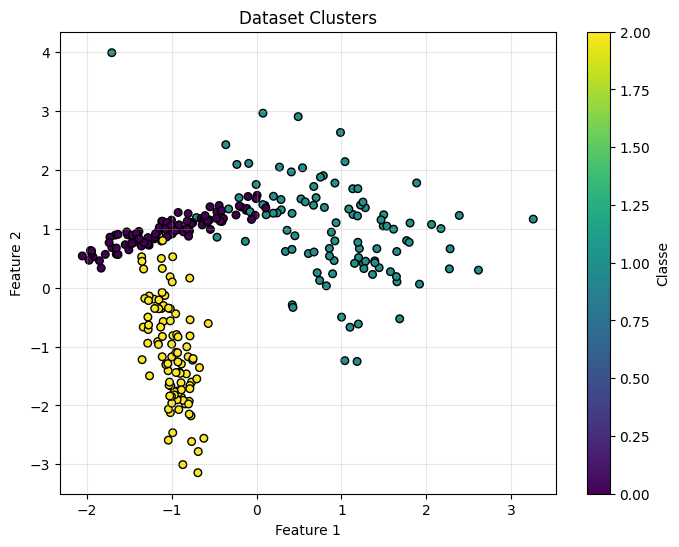

In [35]:
# Creiamo e visualizziamo i dataset
X_blobs, y_blobs = create_classification_dataset(n_samples=300, n_features=2, n_classes=3, 
                                                n_clusters_per_class=1, n_informative=2, n_redundant=0)
# Funzione per visualizzare i dataset
def plot_dataset(X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Classe')
    plt.grid(True, alpha=0.3)
    plt.show()

# Visualizziamo i dataset
plot_dataset(X_blobs, y_blobs, 'Dataset Clusters')

## 4. Implementazione di KNN

Ora implementiamo l'algoritmo KNN da zero:

In [36]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import time

class KNearestNeighbors:
    """
    Implementazione dell'algoritmo K-Nearest Neighbors per classificazione.
    
    Parametri:
    ----------
    k : int, default=3
        Numero di vicini da considerare.
    metric : str, default='euclidean'
        Metrica di distanza da utilizzare ('euclidean', 'manhattan', 'minkowski').
    p : float, default=2
        Parametro per la distanza di Minkowski.
    weights : str, default='uniform'
        Tipo di pesatura ('uniform' o 'distance').
    """
    
    def __init__(self, k=3, metric='euclidean', p=2, weights='uniform'):
        self.k = k
        self.metric = metric
        self.p = p
        self.weights = weights
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        """
        Memorizza i dati di training.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Dati di training.
        y : array-like, shape (n_samples,)
            Etichette di training.
        
        Returns:
        --------
        self : object
        """
        self.X_train = np.asarray(X)
        self.y_train = np.asarray(y)
        
        return self
    
    def _euclidean_distance(self, x1, x2):
        """Calcola la distanza euclidea tra due vettori."""
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def _manhattan_distance(self, x1, x2):
        """Calcola la distanza manhattan tra due vettori."""
        return np.sum(np.abs(x1 - x2))
    
    def _minkowski_distance(self, x1, x2, p):
        """Calcola la distanza di Minkowski tra due vettori."""
        return np.power(np.sum(np.power(np.abs(x1 - x2), p)), 1/p)
    
    def _compute_distance(self, x1, x2):
        """
        Calcola la distanza tra due vettori in base alla metrica specificata.
        
        Parametri:
        ----------
        x1 : array-like
            Primo vettore.
        x2 : array-like
            Secondo vettore.
        
        Returns:
        --------
        float : La distanza calcolata.
        """
        if self.metric == 'euclidean':
            return self._euclidean_distance(x1, x2)
        elif self.metric == 'manhattan':
            return self._manhattan_distance(x1, x2)
        elif self.metric == 'minkowski':
            return self._minkowski_distance(x1, x2, self.p)
        else:
            raise ValueError(f"Metrica '{self.metric}' non supportata")
    
    def predict(self, X):
        """
        Predice le classi per i campioni in X.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Campioni da classificare.
        
        Returns:
        --------
        array, shape (n_samples,) : Le classi predette.
        """
        X = np.asarray(X)
        y_pred = []
        
        for x in X:
            y_pred.append(self._predict_single(x))
            
        return np.array(y_pred)
    
    def _predict_single(self, x):
        """
        Predice la classe per un singolo campione.
        
        Parametri:
        ----------
        x : array-like, shape (n_features,)
            Campione da classificare.
        
        Returns:
        --------
        classe predetta
        """
        # Calcola le distanze tra x e tutti i campioni di training
        distances = []
        for i, x_train in enumerate(self.X_train):
            dist = self._compute_distance(x, x_train)
            distances.append((dist, i))
        
        # Ordina le distanze in ordine crescente e prendi i primi k elementi
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:self.k]
        
        if self.weights == 'uniform':
            # Restituisci la classe più frequente tra i k vicini
            k_nearest_labels = [self.y_train[idx] for _, idx in k_nearest]
            most_common = Counter(k_nearest_labels).most_common(1)
            return most_common[0][0]
        
        elif self.weights == 'distance':
            # Restituisci la classe con il peso più alto basato sulla distanza
            class_weights = {}
            
            for dist, idx in k_nearest:
                label = self.y_train[idx]
                
                # Evita divisione per zero aggiungendo un piccolo epsilon
                weight = 1 / (dist + 1e-10)
                
                if label in class_weights:
                    class_weights[label] += weight
                else:
                    class_weights[label] = weight
            
            return max(class_weights.items(), key=lambda x: x[1])[0]
        
        else:
            raise ValueError(f"Tipo di peso '{self.weights}' non supportato")
    
    def score(self, X, y): #### DA CAMBIARE
        """
        Calcola l'accuratezza del classificatore.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Campioni di test.
        y : array-like, shape (n_samples,)
            Etichette vere dei campioni di test.
        
        Returns:
        --------
        float : L'accuratezza del classificatore.
        """
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy
    
    def plot_decision_boundary(self, X, y, title=None, h=0.1):
        """
        Visualizza il decision boundary del classificatore.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Dati di training.
        y : array-like, shape (n_samples,)
            Etichette di training.
        title : str, optional
            Titolo del grafico.
        h : float, default=0.02
            Passo della griglia.
        """
        if X.shape[1] != 2:
            raise ValueError("Questa funzione può essere utilizzata solo con 2 feature.")
        
        # Creiamo una griglia di punti
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))
        
        # Prediciamo la classe per ogni punto della griglia
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Creiamo la figura
        plt.figure(figsize=(10, 8))
        
        # Plot the decision boundary
        plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)
        
        # Plot the training points
        unique_classes = np.unique(y)
        colors = plt.cm.viridis(np.linspace(0, 1, len(unique_classes)))
        
        for i, cls in enumerate(unique_classes):
            plt.scatter(X[y == cls, 0], X[y == cls, 1], 
                       c=[colors[i]], marker='o', edgecolor='k',
                       label=f'Classe {cls}')
        
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title(title if title else f'Decision Boundary - KNN (k={self.k})')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

Tempo di addestramento: 0.0000 secondi
Tempo di predizione: 0.0746 secondi
Accuratezza: 0.9333


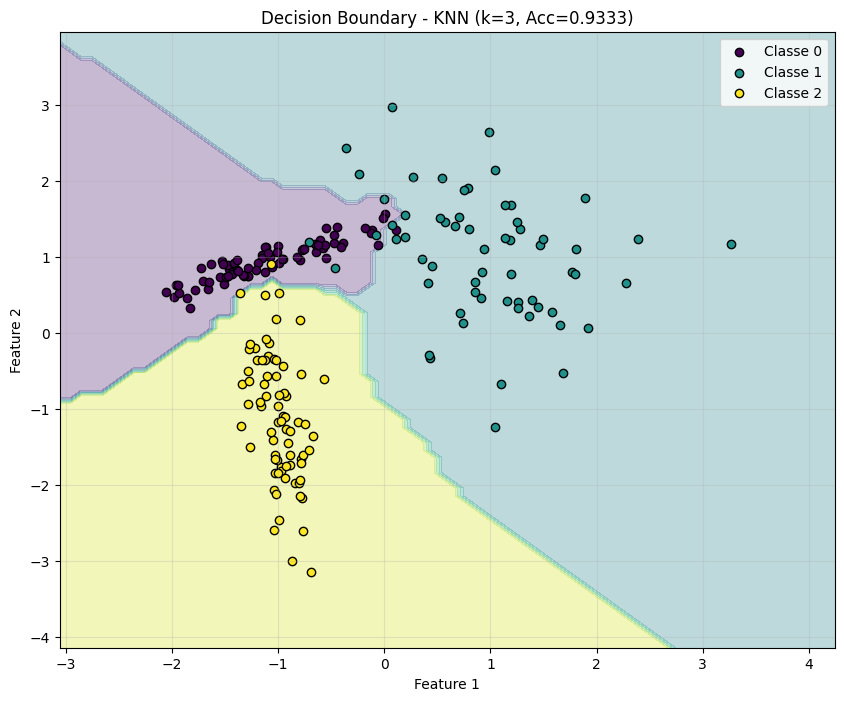

In [37]:
# Dividiamo i dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X_blobs, y_blobs, test_size=0.3, random_state=42)

# Creiamo e addestriamo il modello KNN
start_time = time.time()
knn = KNearestNeighbors(k=3, metric='euclidean', weights='uniform')
knn.fit(X_train, y_train)
print(f"Tempo di addestramento: {time.time() - start_time:.4f} secondi")

# Facciamo le predizioni e valutiamo il modello
start_time = time.time()
y_pred = knn.predict(X_test)
print(f"Tempo di predizione: {time.time() - start_time:.4f} secondi")

# Calcoliamo l'accuratezza
accuracy = knn.score(X_test, y_test)
print(f"Accuratezza: {accuracy:.4f}")

# Visualizziamo il decision boundary
knn.plot_decision_boundary(X_train, y_train, title=f'Decision Boundary - KNN (k=3, Acc={accuracy:.4f})')

## 6. Effetto del Parametro K

Uno dei parametri più importanti in KNN è K, il numero di vicini da considerare. Vediamo come varia la performance al variare di K:

In [38]:
import ipywidgets as widgets
from ipywidgets import interact

def plot_knn_decision_boundary(k=3, metric='euclidean', weights='uniform'):
    """
    Visualizza il decision boundary di KNN con diversi parametri.
    """
    # Addestriamo il modello
    knn = KNearestNeighbors(k=k, metric=metric, weights=weights)
    knn.fit(X_train, y_train)
    
    # Calcoliamo l'accuratezza
    accuracy = knn.score(X_test, y_test)
    print(f"Accuratezza con k={k}, metric={metric}, weights={weights}: {accuracy:.4f}")
    
    # Visualizziamo il decision boundary
    knn.plot_decision_boundary(X_train, y_train, 
                             title=f'Decision Boundary - KNN (k={k}, {metric}, {weights}, Acc={accuracy:.4f})')

# Widget interattivo
interact(
    plot_knn_decision_boundary, 
    k=widgets.IntSlider(min=1, max=20, step=1, value=3, description='K:'),
    metric=widgets.Dropdown(options=['euclidean', 'manhattan', 'minkowski'], 
                           value='euclidean', description='Metrica:'),
    weights=widgets.Dropdown(options=['uniform', 'distance'], 
                           value='uniform', description='Pesi:')
)

interactive(children=(IntSlider(value=3, description='K:', max=20, min=1), Dropdown(description='Metrica:', op…

<function __main__.plot_knn_decision_boundary(k=3, metric='euclidean', weights='uniform')>

**Osservazioni sull'effetto di K:**

- **K piccolo (es. k=1 o k=3)**:
    
    - Confine di decisione più frastagliato e complesso
    - Maggiore varianza (overfitting): il modello segue troppo da vicino i dati di training
    - Alta sensibilità al rumore: un singolo punto anomalo può influenzare significativamente la previsione
- **K grande (es. k=15 o k=20)**:
    
    - Confine di decisione più liscio e regolare
    - Maggiore bias (underfitting): il modello può perdere strutture importanti nei dati
    - Minore sensibilità al rumore: l'influenza di punti anomali è diluita
- **Compromesso**: Scegliere K in modo da bilanciare bias e varianza.

## Scelta del valore di K: sintesi

**K** rappresenta il numero di "vicini" considerati per la classificazione o la regressione.

- Un valore troppo basso o troppo alto può compromettere la qualità del modello.
- La selezione di K è _fondamentale_ per ottenere buoni risultati.

### Impatti pratici della scelta di K

**K troppo piccolo (es. K=1)**

- **Vantaggi:**
    - Modello molto flessibile, adatto a dati ben separati.
- **Svantaggi:**
    - Estremamente sensibile al _rumore_ nei dati e agli _outlier_.
    - Può causare **overfitting**: classifica ogni punto secondo il suo vicino più prossimo, rischiando di seguire troppo i dati di addestramento.

**K troppo grande (es. K molto vicino al numero totale dei dati)**

- **Vantaggi:**
    - Più stabile, meno sensibile agli outlier o al rumore.
- **Svantaggi:**
    - Maggiore rischio di **underfitting**: la decisione diventa troppo "generica" e poco sensibile alle differenze fra le classi.
    - Classi numerose possono dominare sulle minoritarie, portando a classificazioni sbilanciate.

### Scelta tipica e raccomandazioni pratiche

- Valori dispari di K (es. 3, 5, 7) sono consigliabili per evitare situazioni di pareggio nella votazione.
- La selezione ottimale di K si effettua spesso tramite **validazione incrociata** (cross-validation): si testano vari valori di K e si sceglie quello che porta alle migliori prestazioni sul set di validazione.
- La scelta di K può dipendere anche dalla dimensione e dalla distribuzione del dataset:
    - **Dataset piccoli:** Meglio K piccoli per evitare di perdere dettagli.
    - **Dataset grandi e rumorosi:** K più alti favoriscono la robustezza.

### Pro e contro in base al valore di K

|Valore di K|Pro|Contro|
|---|---|---|
|Piccolo|Alta precisione sui dettagli, flessibilità|Sensibile al rumore, rischio overfitting|
|Grande|Maggior robustezza al rumore|Decisioni troppo generiche, rischio underfitting|


## 7. Normalizzazione dei Dati

La normalizzazione è fondamentale per KNN poiché l'algoritmo è basato sulla distanza. Feature con scale diverse possono dominare il calcolo della distanza.

In [40]:
# Creiamo un dataset più complesso con scale diverse
np.random.seed(42)
n_samples = 1000
X_unnormalized = np.zeros((n_samples, 4))  # 4 feature con scale molto diverse

# Feature con scale estremamente diverse
X_unnormalized[:, 0] = np.random.rand(n_samples) * 1000  # Feature 1: valori tra 0 e 1000
X_unnormalized[:, 1] = np.random.rand(n_samples) * 0.1   # Feature 2: valori tra 0 e 0.1
X_unnormalized[:, 2] = np.random.rand(n_samples) * 50    # Feature 3: valori tra 0 e 50
X_unnormalized[:, 3] = np.random.rand(n_samples) * 5     # Feature 4: valori tra 0 e 5

# Creiamo una regola di classificazione più complessa che usa tutte le feature
y_unnormalized = np.zeros(n_samples)

# La classe dipende da una combinazione non lineare di tutte le feature
# con pesi bilanciati rispetto alle scale
scores = (X_unnormalized[:, 0]/1000) + (X_unnormalized[:, 1]/0.1)*3 + \
         (X_unnormalized[:, 2]/50)*2 - (X_unnormalized[:, 3]/5)
         
# Aggiungiamo del rumore per rendere più difficile la classificazione
noise = np.random.randn(n_samples) * 0.7
y_unnormalized[scores + noise > 3] = 1  # Classe 1 se score > 3


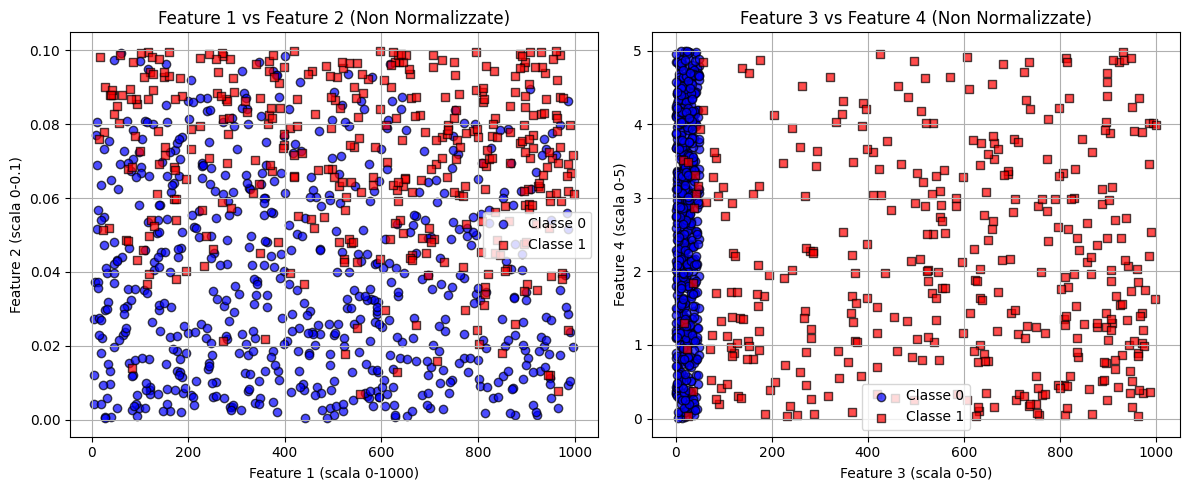

In [41]:
# Dividiamo i dati
X_train_un, X_test_un, y_train_un, y_test_un = train_test_split(X_unnormalized, y_unnormalized, 
                                                              test_size=0.3, random_state=42)

# Visualizziamo le due feature con il maggior contrasto di scala (Feature 0 e Feature 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_unnormalized[y_unnormalized == 0, 0], X_unnormalized[y_unnormalized == 0, 1], 
           c='blue', marker='o', label='Classe 0', edgecolor='k', alpha=0.7)
plt.scatter(X_unnormalized[y_unnormalized == 1, 0], X_unnormalized[y_unnormalized == 1, 1], 
           c='red', marker='s', label='Classe 1', edgecolor='k', alpha=0.7)
plt.title('Feature 1 vs Feature 2 (Non Normalizzate)')
plt.xlabel('Feature 1 (scala 0-1000)')
plt.ylabel('Feature 2 (scala 0-0.1)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_unnormalized[y_unnormalized == 0, 2], X_unnormalized[y_unnormalized == 0, 3], 
           c='blue', marker='o', label='Classe 0', edgecolor='k', alpha=0.7)
plt.scatter(X_unnormalized[y_unnormalized == 1, 0], X_unnormalized[y_unnormalized == 1, 3], 
           c='red', marker='s', label='Classe 1', edgecolor='k', alpha=0.7)
plt.title('Feature 3 vs Feature 4 (Non Normalizzate)')
plt.xlabel('Feature 3 (scala 0-50)')
plt.ylabel('Feature 4 (scala 0-5)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [42]:
# KNN senza normalizzazione
print("Test KNN senza normalizzazione:")
k_values = [1, 3, 5, 7, 11, 15, 21, 80, 100]
for k in k_values:
    knn_unnorm = KNearestNeighbors(k=k)
    knn_unnorm.fit(X_train_un, y_train_un)
    accuracy_unnorm = knn_unnorm.score(X_test_un, y_test_un)
    print(f"K={k}, Accuratezza: {accuracy_unnorm:.4f}")

Test KNN senza normalizzazione:
K=1, Accuratezza: 0.6633
K=3, Accuratezza: 0.6833
K=5, Accuratezza: 0.6933
K=7, Accuratezza: 0.7033
K=11, Accuratezza: 0.7300
K=15, Accuratezza: 0.7167
K=21, Accuratezza: 0.7300
K=80, Accuratezza: 0.6767
K=100, Accuratezza: 0.6767


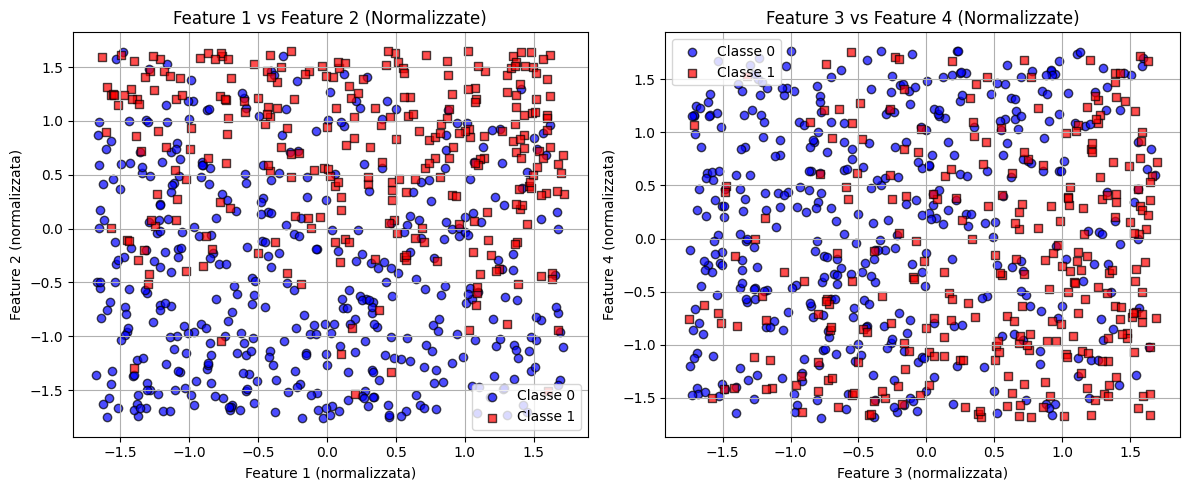

In [43]:
# Normalizzazione Z-score
def z_score_normalize(X_train, X_test):
    """Normalizza i dati usando z-score (media 0, varianza 1) basato sul train set."""
    X_train_norm = np.zeros_like(X_train)
    X_test_norm = np.zeros_like(X_test)
    
    for i in range(X_train.shape[1]):
        mean = X_train[:, i].mean()
        std = X_train[:, i].std()
        X_train_norm[:, i] = (X_train[:, i] - mean) / std
        X_test_norm[:, i] = (X_test[:, i] - mean) / std
    
    return X_train_norm, X_test_norm

# Normalizzazione z-score
X_train_norm, X_test_norm = z_score_normalize(X_train_un, X_test_un)

# Visualizziamo i dati normalizzati
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train_norm[y_train_un == 0, 0], X_train_norm[y_train_un == 0, 1], 
           c='blue', marker='o', label='Classe 0', edgecolor='k', alpha=0.7)
plt.scatter(X_train_norm[y_train_un == 1, 0], X_train_norm[y_train_un == 1, 1], 
           c='red', marker='s', label='Classe 1', edgecolor='k', alpha=0.7)
plt.title('Feature 1 vs Feature 2 (Normalizzate)')
plt.xlabel('Feature 1 (normalizzata)')
plt.ylabel('Feature 2 (normalizzata)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_train_norm[y_train_un == 0, 2], X_train_norm[y_train_un == 0, 3], 
           c='blue', marker='o', label='Classe 0', edgecolor='k', alpha=0.7)
plt.scatter(X_train_norm[y_train_un == 1, 2], X_train_norm[y_train_un == 1, 3], 
           c='red', marker='s', label='Classe 1', edgecolor='k', alpha=0.7)
plt.title('Feature 3 vs Feature 4 (Normalizzate)')
plt.xlabel('Feature 3 (normalizzata)')
plt.ylabel('Feature 4 (normalizzata)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [15]:
# KNN senza normalizzazione
print("Test KNN senza normalizzazione:")
k_values = [1, 3, 5, 7, 11, 15, 21, 80, 100]
for k in k_values:
    knn_unnorm = KNearestNeighbors(k=k)
    knn_unnorm.fit(X_train_un, y_train_un)
    accuracy_unnorm = knn_unnorm.score(X_test_un, y_test_un)
    print(f"K={k}, Accuratezza: {accuracy_unnorm:.4f}")

Test KNN senza normalizzazione:
K=1, Accuratezza: 0.6633
K=3, Accuratezza: 0.6833
K=5, Accuratezza: 0.6933
K=7, Accuratezza: 0.7033
K=11, Accuratezza: 0.7300
K=15, Accuratezza: 0.7167
K=21, Accuratezza: 0.7300
K=80, Accuratezza: 0.6767
K=100, Accuratezza: 0.6767


In [16]:
# KNN con normalizzazione
print("\nTest KNN con normalizzazione z-score:")
accuracies_norm = []
for k in k_values:
    knn_norm = KNearestNeighbors(k=k)
    knn_norm.fit(X_train_norm, y_train_un)
    accuracy_norm = knn_norm.score(X_test_norm, y_test_un)
    accuracies_norm.append(accuracy_norm)
    print(f"K={k}, Accuratezza: {accuracy_norm:.4f}")
# Confronto tra accuracies
accuracies_unnorm = []


Test KNN con normalizzazione z-score:
K=1, Accuratezza: 0.7933
K=3, Accuratezza: 0.8300
K=5, Accuratezza: 0.8200
K=7, Accuratezza: 0.8200
K=11, Accuratezza: 0.8300
K=15, Accuratezza: 0.8367
K=21, Accuratezza: 0.8533
K=80, Accuratezza: 0.8400
K=100, Accuratezza: 0.8400


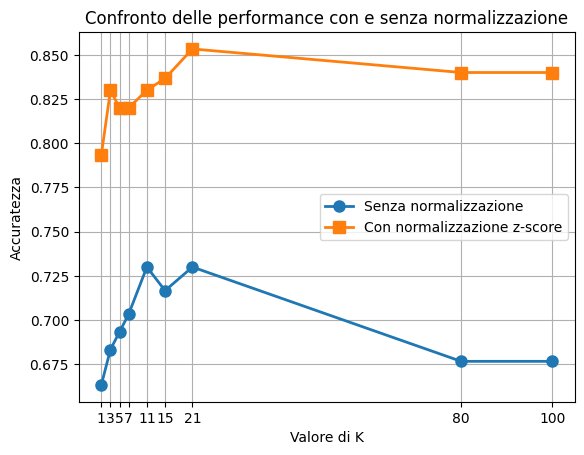

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

In [17]:
# Raccogliamo le accuratezze senza normalizzazione
for k in k_values:
    knn_unnorm = KNearestNeighbors(k=k)
    knn_unnorm.fit(X_train_un, y_train_un)
    accuracy_unnorm = knn_unnorm.score(X_test_un, y_test_un)
    accuracies_unnorm.append(accuracy_unnorm)

plt.plot(k_values, accuracies_unnorm, 'o-', label='Senza normalizzazione', linewidth=2, markersize=8)
plt.plot(k_values, accuracies_norm, 's-', label='Con normalizzazione z-score', linewidth=2, markersize=8)

plt.title('Confronto delle performance con e senza normalizzazione')
plt.xlabel('Valore di K')
plt.ylabel('Accuratezza')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Visualizziamo i decision boundary
plt.figure(figsize=(15, 6))

## 8. KNN per Regressione

Finora abbiamo utilizzato KNN per classificazione, ma può essere utilizzato anche per regressione:


In [18]:
class KNNRegressor:
    """
    Implementazione dell'algoritmo K-Nearest Neighbors per regressione.
    
    Parametri:
    ----------
    k : int, default=3
        Numero di vicini da considerare.
    metric : str, default='euclidean'
        Metrica di distanza da utilizzare ('euclidean', 'manhattan', 'minkowski').
    p : float, default=2
        Parametro per la distanza di Minkowski.
    weights : str, default='uniform'
        Tipo di pesatura ('uniform' o 'distance').
    """
    
    def __init__(self, k=3, metric='euclidean', p=2, weights='uniform'):
        self.k = k
        self.metric = metric
        self.p = p
        self.weights = weights
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        """
        Memorizza i dati di training.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Dati di training.
        y : array-like, shape (n_samples,)
            Valori target di training.
        
        Returns:
        --------
        self : object
        """
        self.X_train = np.asarray(X)
        self.y_train = np.asarray(y)
        
        return self
    
    def _euclidean_distance(self, x1, x2):
        """Calcola la distanza euclidea tra due vettori."""
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def _manhattan_distance(self, x1, x2):
        """Calcola la distanza manhattan tra due vettori."""
        return np.sum(np.abs(x1 - x2))
    
    def _minkowski_distance(self, x1, x2, p):
        """Calcola la distanza di Minkowski tra due vettori."""
        return np.power(np.sum(np.power(np.abs(x1 - x2), p)), 1/p)
    
    def _compute_distance(self, x1, x2):
        """Calcola la distanza tra due vettori in base alla metrica specificata."""
        if self.metric == 'euclidean':
            return self._euclidean_distance(x1, x2)
        elif self.metric == 'manhattan':
            return self._manhattan_distance(x1, x2)
        elif self.metric == 'minkowski':
            return self._minkowski_distance(x1, x2, self.p)
        else:
            raise ValueError(f"Metrica '{self.metric}' non supportata")
    
    def predict(self, X):
        """
        Predice i valori per i campioni in X.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Campioni da predire.
        
        Returns:
        --------
        array, shape (n_samples,) : I valori predetti.
        """
        X = np.asarray(X)
        y_pred = []
        
        for x in X:
            y_pred.append(self._predict_single(x))
            
        return np.array(y_pred)
    
    def _predict_single(self, x):
        """
        Predice il valore per un singolo campione.
        
        Parametri:
        ----------
        x : array-like, shape (n_features,)
            Campione da predire.
        
        Returns:
        --------
        float : Il valore predetto.
        """
        # Calcola le distanze tra x e tutti i campioni di training
        distances = []
        for i, x_train in enumerate(self.X_train):
            dist = self._compute_distance(x, x_train)
            distances.append((dist, i))
        
        # Ordina le distanze in ordine crescente e prendi i primi k elementi
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:self.k]
        
        if self.weights == 'uniform':
            # Media semplice dei k vicini
            k_nearest_values = [self.y_train[idx] for _, idx in k_nearest]
            return np.mean(k_nearest_values)
        
        elif self.weights == 'distance':
            # Media pesata in base alla distanza
            weights_sum = 0
            weighted_sum = 0
            
            for dist, idx in k_nearest:
                # Evita divisione per zero aggiungendo un piccolo epsilon
                weight = 1 / (dist + 1e-10)
                
                weighted_sum += weight * self.y_train[idx]
                weights_sum += weight
            
            return weighted_sum / weights_sum
        
        else:
            raise ValueError(f"Tipo di peso '{self.weights}' non supportato")
    
    def score(self, X, y):
        """
        Calcola il coefficient of determination R^2 del modello.
        
        Parametri:
        ----------
        X : array-like, shape (n_samples, n_features)
            Campioni di test.
        y : array-like, shape (n_samples,)
            Valori target di test.
        
        Returns:
        --------
        float : Il coefficient of determination R^2.
        """
        y_pred = self.predict(X)
        u = ((y - y_pred) ** 2).sum()
        v = ((y - y.mean()) ** 2).sum()
        return 1 - u/v


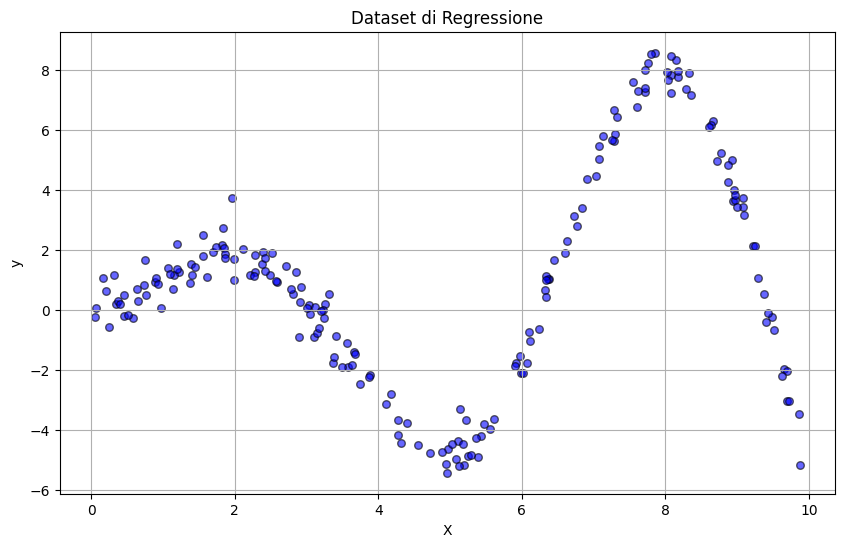

In [44]:
# Creiamo un dataset di regressione
np.random.seed(42)
X_reg = np.random.rand(200, 1) * 10  # Feature tra 0 e 10
y_reg = X_reg * np.sin(X_reg) + np.random.randn(200, 1) * 0.5  # Target con rumore
y_reg = y_reg.flatten()

# Dividiamo i dati
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, 
                                                                  test_size=0.3, random_state=42)

# Visualizziamo i dati
plt.figure(figsize=(10, 6))
plt.scatter(X_reg, y_reg, c='blue', s=30, edgecolor='k', alpha=0.6)
plt.title('Dataset di Regressione')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show()

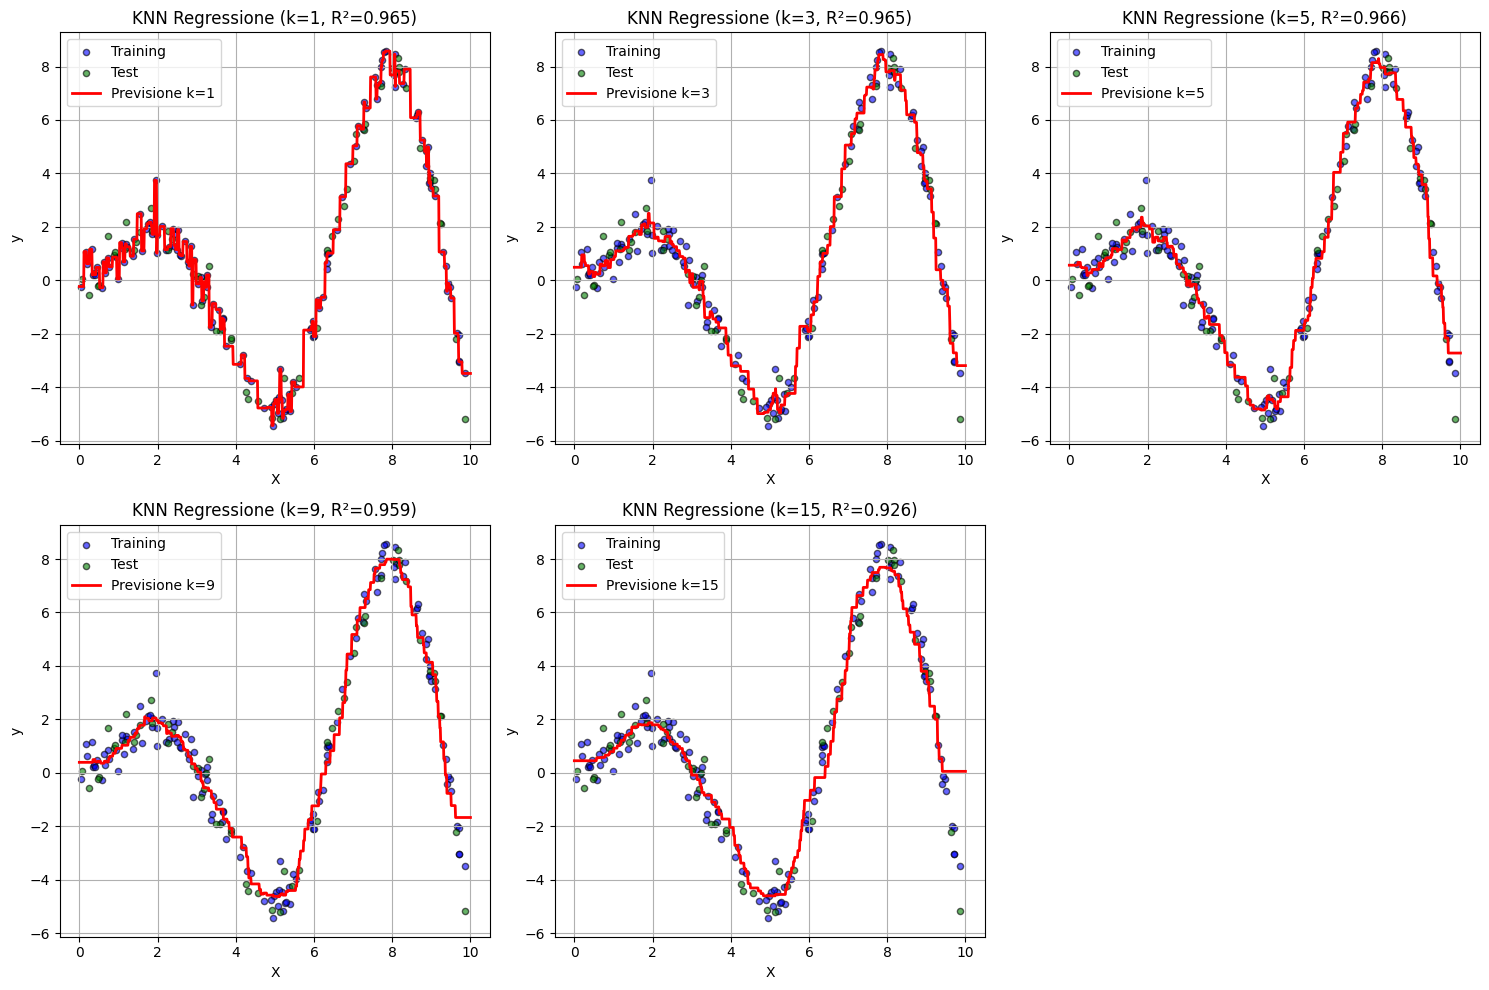

In [45]:

# Testiamo diversi valori di k
k_values = [1, 3, 5, 9, 15]
plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values):
    # Addestriamo il modello
    knn_reg = KNNRegressor(k=k, weights='uniform')
    knn_reg.fit(X_train_reg, y_train_reg)
    
    # Predizioni
    X_plot = np.linspace(0, 10, 1000).reshape(-1, 1)
    y_plot = knn_reg.predict(X_plot)
    
    # Calcoliamo il R²
    r2 = knn_reg.score(X_test_reg, y_test_reg)
    
    # Visualizziamo
    plt.subplot(2, 3, i+1)
    plt.scatter(X_train_reg, y_train_reg, c='blue', s=20, edgecolor='k', alpha=0.6, label='Training')
    plt.scatter(X_test_reg, y_test_reg, c='green', s=20, edgecolor='k', alpha=0.6, label='Test')
    plt.plot(X_plot, y_plot, 'r-', linewidth=2, label=f'Previsione k={k}')
    plt.title(f'KNN Regressione (k={k}, R²={r2:.3f})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

### Confronto tra pesi 'uniform' e 'distance'


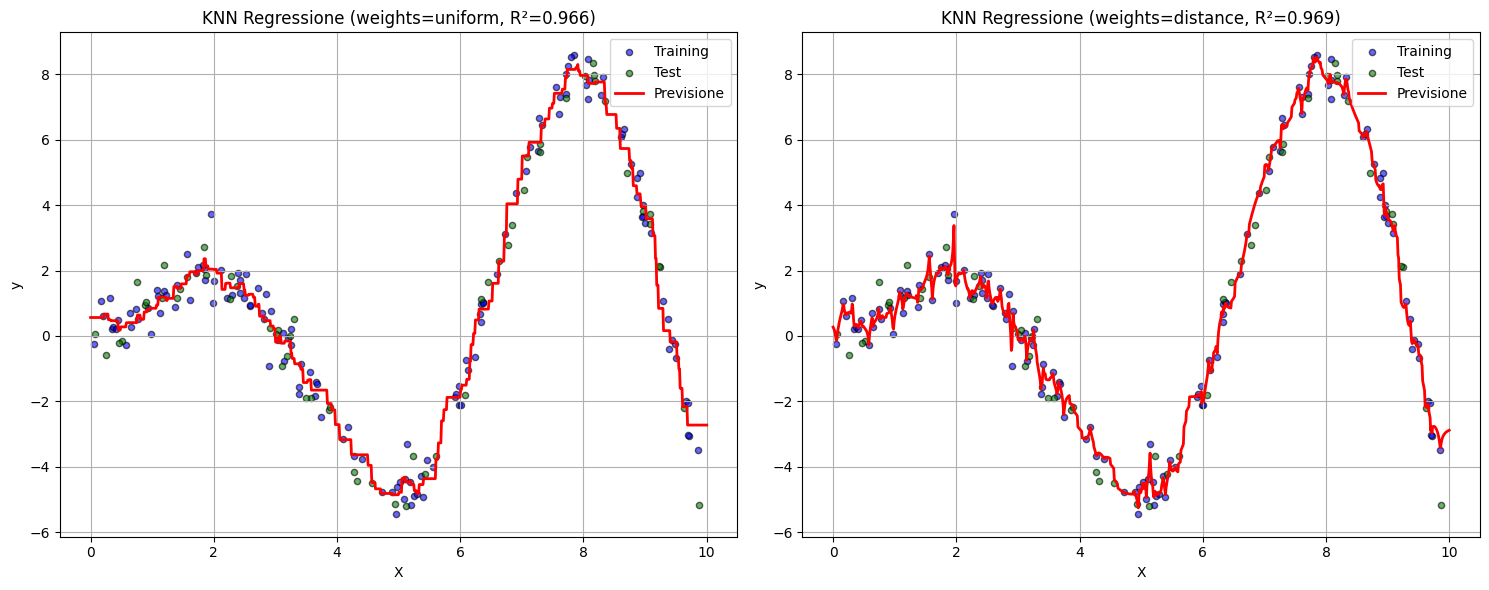

In [21]:
plt.figure(figsize=(15, 6))

for i, weights in enumerate(['uniform', 'distance']):
    # Addestriamo il modello
    knn_reg = KNNRegressor(k=5, weights=weights)
    knn_reg.fit(X_train_reg, y_train_reg)
    
    # Predizioni
    X_plot = np.linspace(0, 10, 1000).reshape(-1, 1)
    y_plot = knn_reg.predict(X_plot)
    
    # Calcoliamo il R²
    r2 = knn_reg.score(X_test_reg, y_test_reg)
    
    # Visualizziamo
    plt.subplot(1, 2, i+1)
    plt.scatter(X_train_reg, y_train_reg, c='blue', s=20, edgecolor='k', alpha=0.6, label='Training')
    plt.scatter(X_test_reg, y_test_reg, c='green', s=20, edgecolor='k', alpha=0.6, label='Test')
    plt.plot(X_plot, y_plot, 'r-', linewidth=2, label=f'Previsione')
    plt.title(f'KNN Regressione (weights={weights}, R²={r2:.3f})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

**Osservazioni su KNN per Regressione:**

- Con **k=1**, il modello passa esattamente attraverso ogni punto di training (overfitting).
- All'aumentare di **k**, la curva diventa più liscia (meno varianza, più bias).
- Con **weights='distance'**, i punti più vicini hanno un'influenza maggiore, risultando in una curva più "reattiva" alle variazioni locali.
- Scegliere **k** è un bilanciamento tra:
    - Underfitting (k troppo grande)
    - Overfitting (k troppo piccolo)

## 9. Limitazioni e Ottimizzazioni

### Limitazioni di KNN:

1. **Costo computazionale**: Per ogni predizione, KNN deve calcolare la distanza con tutti gli esempi di training (O(n) per query).
2. **Dimensionalità**: Le performance degradano in spazi ad alta dimensionalità.
3. **Sensibilità alla scala delle feature**: Richiede normalizzazione.
4. **Memoria**: Memorizza l'intero dataset di training.

### Possibili ottimizzazioni:

**Strutture dati per la ricerca dei vicini**:

    K-d trees

## 10. Implementazione di strutture dati avanzate (k-d tree)

Una delle più importanti ottimizzazioni per KNN è l'uso di strutture dati per accelerare la ricerca dei vicini. Ecco una semplice implementazione di k-d tree:

In [22]:
import numpy as np
from collections import Counter
import time


class KNNWithKDTree:
    """
    Implementazione di KNN con k-d tree per ricerca efficiente dei vicini.
    """
    def __init__(self, k=3, weights='uniform'):
        self.k = k
        self.weights = weights
        self.kdtree = None
    
    def fit(self, X, y):
        """Costruisce il k-d tree con i dati di training."""
        X = np.asarray(X)
        y = np.asarray(y)
        self.kdtree = KDTree(X, y)
        return self
    
    def predict(self, X):
        """Predice le classi per i campioni in X usando il k-d tree."""
        X = np.asarray(X)
        y_pred = []
        
        for x in X:
            # Troviamo i k vicini più prossimi
            k_nearest = self.kdtree.find_k_nearest(x, self.k)
            
            if not k_nearest:  # Se la lista è vuota
                # In questo caso, assegniamo una classe di default (la prima trovata nel dataset)
                # Questo non dovrebbe mai accadere con un dataset ben formato
                y_pred.append(0)
                continue
            
            if self.weights == 'uniform':
                # Voto uniforme: prendiamo la classe più frequente
                k_nearest_labels = [label for _, label, _ in k_nearest]
                most_common = Counter(k_nearest_labels).most_common(1)
                y_pred.append(most_common[0][0])
            
            elif self.weights == 'distance':
                # Voto pesato: pesiamo in base alla distanza
                class_weights = {}
                
                for _, label, dist in k_nearest:
                    # Evita divisione per zero
                    weight = 1 / (dist + 1e-10)
                    
                    if label in class_weights:
                        class_weights[label] += weight
                    else:
                        class_weights[label] = weight
                
                # Restituisce la classe con il peso maggiore
                predicted_class = max(class_weights.items(), key=lambda x: x[1])[0]
                y_pred.append(predicted_class)
        
        return np.array(y_pred)
    
    def score(self, X, y):
        """Calcola l'accuratezza del classificatore."""
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

class KDNode:
    """
    Nodo di un k-d tree.
    """
    def __init__(self, point, label, left=None, right=None, axis=0):
        self.point = point
        self.label = label
        self.left = left
        self.right = right
        self.axis = axis

class KDTree:
    """
    Implementazione di un k-d tree per la ricerca efficiente dei vicini.
    """
    def __init__(self, points, labels):
        self.root = None
        if len(points) > 0:
            self.k = len(points[0])
            points = np.asarray(points)
            labels = np.asarray(labels)
            self.root = self._build_tree(points, labels, 0)
    
    def _build_tree(self, points, labels, depth):
        """Costruisce ricorsivamente l'albero."""
        n = len(points)
        if n == 0:
            return None
        
        # Selezioniamo l'asse in base alla profondità corrente
        axis = depth % self.k
        
        # Ordiniamo i punti in base all'asse corrente
        sorted_idx = np.argsort(points[:, axis])
        points = points[sorted_idx]
        labels = labels[sorted_idx]
        
        # Prendiamo il punto mediano come nodo corrente
        median = n // 2
        
        # Creiamo ricorsivamente i sottoalberi
        return KDNode(
            point=points[median],
            label=labels[median],
            left=self._build_tree(points[:median], labels[:median], depth+1),
            right=self._build_tree(points[median+1:], labels[median+1:], depth+1),
            axis=axis
        )
    
    
    def find_k_nearest(self, point, k):
        """Trova i k punti più vicini a point."""
        import heapq
        if self.root is None:
            return []
        
        # Lista di k punti più vicini [(dist, label_id, point, label), ...]
        # Aggiungiamo label_id per evitare errori di confronto tra array
        nearest = []
        
        # Usiamo una funzione interna per la ricerca
        def _search(node):
            if node is None:
                return
            
            # Calcoliamo la distanza euclidea
            dist = float(np.sqrt(np.sum((node.point - point) ** 2)))
            
            # Se non abbiamo ancora k punti o questo è migliore dell'attuale peggiore
            if len(nearest) < k:
                # Aggiungiamo un id univoco per evitare confronti tra array
                heapq.heappush(nearest, (-dist, id(node), node.point, node.label))
            elif -dist > nearest[0][0]:  # Confrontiamo solo scalari
                heapq.heappop(nearest)
                heapq.heappush(nearest, (-dist, id(node), node.point, node.label))
            
            # Determiniamo quale sottoalbero attraversare prima
            axis = node.axis
            next_branch = node.left if point[axis] < node.point[axis] else node.right
            other_branch = node.right if point[axis] < node.point[axis] else node.left
            
            # Visitiamo il ramo più promettente
            _search(next_branch)
            
            # Verifichiamo se dobbiamo visitare anche l'altro ramo
            if len(nearest) < k or abs(float(point[axis] - node.point[axis])) < -nearest[0][0]:
                _search(other_branch)
        
        # Iniziamo la ricerca dalla radice
        _search(self.root)
        
        # Convertiamo il formato e ordiniamo per distanza
        result = []
        for neg_dist, _, p, label in sorted(nearest, key=lambda x: -x[0]):
            result.append((p, label, -neg_dist))
        
        return result

# Esempio di utilizzo del k-d tree
X, y = create_classification_dataset(n_samples=5000, n_features=5, n_classes=2, 
                                                n_clusters_per_class=2, n_informative=2, n_redundant=0)

# Dividiamo i dati
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN senza k-d tree
start_time = time.time()
knn_nokd = KNearestNeighbors(k=3)
knn_nokd.fit(X_train, y_train)
y_pred_nokd = knn_nokd.predict(X_test)
time_nokd = time.time() - start_time
accuracy_nokd = np.mean(y_pred_nokd == y_test)

# KNN con k-d tree
start_time = time.time()
knn_kd = KNNWithKDTree(k=3)
knn_kd.fit(X_train, y_train)
y_pred_kd = knn_kd.predict(X_test)
time_kd = time.time() - start_time
accuracy_kd = np.mean(y_pred_kd == y_test)

print(f"KNN senza k-d tree: Accuratezza = {accuracy_nokd:.4f}, Tempo = {time_nokd:.4f} secondi")
print(f"KNN con k-d tree: Accuratezza = {accuracy_kd:.4f}, Tempo = {time_kd:.4f} secondi")
print(f"Speedup: {time_nokd / time_kd:.2f}x")

KNN senza k-d tree: Accuratezza = 0.8747, Tempo = 21.3864 secondi
KNN con k-d tree: Accuratezza = 0.8747, Tempo = 1.3154 secondi
Speedup: 16.26x


- Il k-d tree divide ricorsivamente lo spazio delle feature, facilitando la ricerca dei vicini.
- Con bassa dimensionalità, può ridurre significativamente il tempo di ricerca da O(n) a O(log n).
- L'efficienza diminuisce con l'aumentare delle dimensioni (>20 feature).
- La costruzione dell'albero ha costo O(n log n), ma è un costo una tantum.

## 11. Ottimizzazione dei parametri con scikit-learn
Finora abbiamo implementato KNN da zero, ma scikit-learn offre strumenti potenti per ottimizzare automaticamente i parametri. Vediamo come usare `GridSearchCV` per trovare il valore ottimale di K:

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import time
X, y = create_classification_dataset(n_samples=15000, n_features=10, n_classes=2, 
                                                n_clusters_per_class=1, n_informative=5, n_redundant=0)
# Dividiamo i dati in training e test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
# Dividiamo i dati in training e test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizziamo i dati (importante per KNN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definiamo i parametri da testare
param_grid = {
    'n_neighbors': range(1, 31, 2),     # Valori dispari da 1 a 29
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [48]:
# Creiamo il modello KNN
knn = KNeighborsClassifier()

# Creiamo e addestriamo il GridSearchCV
start_time = time.time()
grid_search = GridSearchCV(
    knn, 
    param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Usa tutti i core disponibili
)

print("Inizio ricerca parametri ottimali...")
grid_search.fit(X_train_scaled, y_train)
print(f"Ricerca completata in {time.time() - start_time:.2f} secondi")

Inizio ricerca parametri ottimali...
Ricerca completata in 24.08 secondi


Miglior combinazione di parametri: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}
Miglior score (accuracy): 0.9120
Accuratezza sul test set: 0.9124


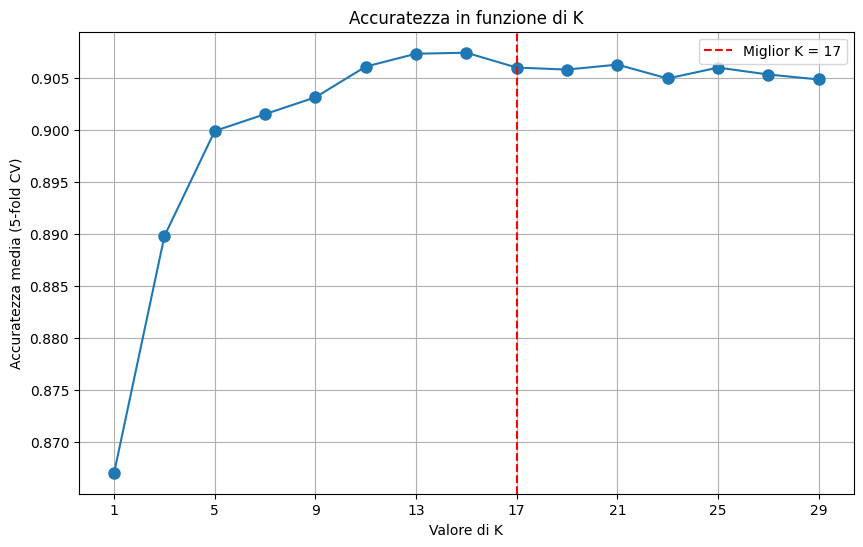

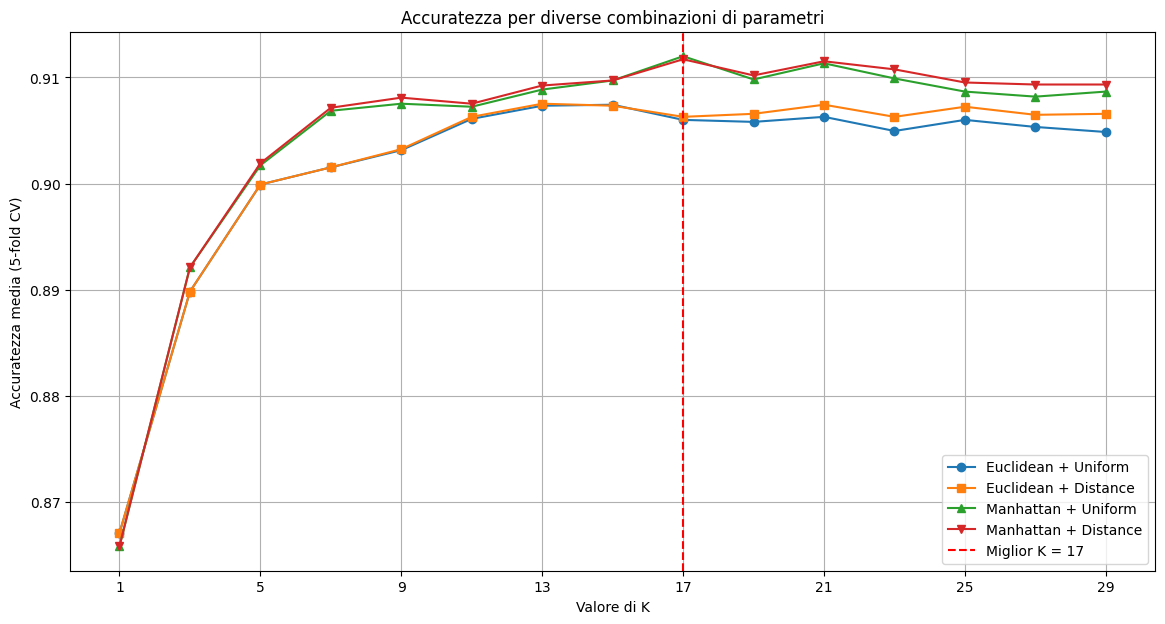

In [49]:
# Risultati
print(f"Miglior combinazione di parametri: {grid_search.best_params_}")
print(f"Miglior score (accuracy): {grid_search.best_score_:.4f}")

# Valutiamo sul test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test_scaled, y_test)
print(f"Accuratezza sul test set: {accuracy:.4f}")

# Visualizziamo i risultati per K
k_values = param_grid['n_neighbors']
cv_results = grid_search.cv_results_

# Estraiamo i risultati solo per weights='uniform' e metric='euclidean'
mask = (cv_results['param_weights'] == 'uniform') & \
       (cv_results['param_metric'] == 'euclidean')
       
k_scores = [cv_results['mean_test_score'][i] for i, m in enumerate(mask) if m]

plt.figure(figsize=(10, 6))
plt.plot(k_values, k_scores, 'o-', markersize=8)
plt.axvline(x=grid_search.best_params_['n_neighbors'], color='red', linestyle='--', 
           label=f"Miglior K = {grid_search.best_params_['n_neighbors']}")
plt.title('Accuratezza in funzione di K')
plt.xlabel('Valore di K')
plt.ylabel('Accuratezza media (5-fold CV)')
plt.grid(True)
plt.legend()
plt.xticks(k_values[::2])  # Mostra solo alcuni valori di K per chiarezza
plt.show()

# Visualizziamo i risultati per tutte le combinazioni di parametri
plt.figure(figsize=(14, 7))

# Per metric='euclidean'
mask_euclidean_uniform = (cv_results['param_metric'] == 'euclidean') & \
                        (cv_results['param_weights'] == 'uniform')
                         
mask_euclidean_distance = (cv_results['param_metric'] == 'euclidean') & \
                         (cv_results['param_weights'] == 'distance')

euclidean_uniform_scores = [cv_results['mean_test_score'][i] for i, m in enumerate(mask_euclidean_uniform) if m]
euclidean_distance_scores = [cv_results['mean_test_score'][i] for i, m in enumerate(mask_euclidean_distance) if m]

# Per metric='manhattan'
mask_manhattan_uniform = (cv_results['param_metric'] == 'manhattan') & \
                        (cv_results['param_weights'] == 'uniform')
                         
mask_manhattan_distance = (cv_results['param_metric'] == 'manhattan') & \
                         (cv_results['param_weights'] == 'distance')

manhattan_uniform_scores = [cv_results['mean_test_score'][i] for i, m in enumerate(mask_manhattan_uniform) if m]
manhattan_distance_scores = [cv_results['mean_test_score'][i] for i, m in enumerate(mask_manhattan_distance) if m]

plt.plot(k_values, euclidean_uniform_scores, 'o-', label='Euclidean + Uniform')
plt.plot(k_values, euclidean_distance_scores, 's-', label='Euclidean + Distance')
plt.plot(k_values, manhattan_uniform_scores, '^-', label='Manhattan + Uniform')
plt.plot(k_values, manhattan_distance_scores, 'v-', label='Manhattan + Distance')

plt.axvline(x=grid_search.best_params_['n_neighbors'], color='red', linestyle='--', 
           label=f"Miglior K = {grid_search.best_params_['n_neighbors']}")

plt.title('Accuratezza per diverse combinazioni di parametri')
plt.xlabel('Valore di K')
plt.ylabel('Accuratezza media (5-fold CV)')
plt.grid(True)
plt.legend()
plt.xticks(k_values[::2])  # Mostra solo alcuni valori di K per chiarezza
plt.show()